### D213 - Advanced Data Analytics - PA2

### Background Info:

**Build a neural network designed to learn word usage and context using NLP techniques.**

_You will provide visualizations and a report, as well as build your network in an interactive development environment._

**A1 _Question: Using historical product reviews, what effect will Natural Language Processing and Neural Networks have on the ability to accurately predict future consumer sentiment?_**

--- 
### Import Libraries
---

In [58]:
# Standard libraries

import numpy as np # Array manipulation
import pandas as pd # DataFrame manipulation

# Plot Data
import seaborn as sns # for plotting
import matplotlib.pyplot as plt
%matplotlib inline
# import plotly.offline as py # for plotting
# py.init_notebook_mode(connected=True) 
# import plotly.graph_objs as go 
# import plotly.tools as tls 
# import plotly.express as px

# Local File Path Handling
import gzip # for reading compressed files
import os, sys # OS and System commands

# Stripping out unnecessary chars
import re # regex

# Handle Warnings
import warnings
warnings.filterwarnings('ignore')
# Warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Timer for debugging
%time
%timeit

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.81 µs


In [59]:
# Analytics Library Imports

from scipy import signal 
import sklearn # Predictive Analytics
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [60]:
# TensorFlow and Keras

import tensorflow as tf # ML / Deep Learning
import keras # Deep Learning API
from keras import preprocessing

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [61]:
import nltk # Natural Language Processing
nltk.download('omw-1.4') # Download the OntoMW dictionary
from nltk.corpus import stopwords # NLTK Corpus Stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # For WordCloud 
from PIL import Image #Pillow with WordClout
from nltk.tokenize import word_tokenize # from nltk import word_tokenize
#from nltk import word_tokenize
from nltk.stem import PorterStemmer as porter # Stemming of Strings
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jasonewillis/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jasonewillis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jasonewillis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jasonewillis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [62]:
from platform import python_version
print('The python version used is: %s' % python_version())
print('TensorFlow Version used is: ',tf.__version__)


The python version used is: 3.7.13
TensorFlow Version used is:  2.7.0


In [63]:
# %lsmagic

In [64]:
# Verify Input File Locations
print(os.listdir(path='./Data/sentiment_labelled_sentences/'))
# Output: ['.DS_Store', 'combo.txt', 'amazon_cells_labelled.txt', 'readme.txt', 'yelp_labelled.txt', 'imdb_labelled.txt']

['combo.txt', 'amazon_cells_labelled.txt', 'readme.txt', '.ipynb_checkpoints', 'yelp_labelled.txt', 'imdb_labelled.txt']


---
### Load Data From UCI *.txt Files to DFs
---

In [65]:
# load data file
df_amz = pd.read_csv('./Data/sentiment_labelled_sentences/amazon_cells_labelled.txt', delimiter='\t', header=None)
df_amz.columns = ['review', 'sentiment']

df_imdb = pd.read_csv('./Data/sentiment_labelled_sentences/imdb_labelled.txt', delimiter='\t', header=None)
df_imdb.columns = ['review', 'sentiment']

df_yelp = pd.read_csv('./Data/sentiment_labelled_sentences/yelp_labelled.txt', delimiter='\t', header=None)
df_yelp.columns = ['review', 'sentiment']

In [66]:
# Concatinate and Read in Combo File to DF

df_concat = pd.concat([df_amz, df_imdb, df_yelp], axis=0)
df = df_concat.copy()
df.reset_index(drop=True, col_fill=True, inplace=True)
#df.info()
df.head()

,review,sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


In [67]:
# Create Label for ratings 1 and 0 - just for the experience if ratings were 0 - 5
def label(i):
    return 1 if i >= 1 else 0
df['label'] = df['sentiment'].apply(label)
df.head(10)

,review,sentiment,label
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,0
1,"Good case, Excellent value.",1,1
2,Great for the jawbone.,1,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,0
4,The mic is great.,1,1
5,I have to jiggle the plug to get it to line up right to get decent volume.,0,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0,0
7,If you are Razr owner...you must have this!,1,1
8,"Needless to say, I wasted my money.",0,0
9,What a waste of money and time!.,0,0


In [68]:
#Rename the columns
#df.rename(columns = {"rating": "overall"}, inplace=True) Do this if applicable but I'm not doing here.

# Drop the column named rating
#df.drop(['sentiment'],axis=1)
df = df.drop(['sentiment'],axis=1)
df.head()

,review,label
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


In [69]:
#pd.DataFrame(df_concat).to_csv('./Output/_df_CONCAT.csv') 
#pd.DataFrame(df).to_csv('./Output/_Start_df.csv')

---
### Data Cleaning & Exploratory Data Analysis
---

In [70]:
# Convert non-string values (if any)
for i in range (0, len(df)-1):
    if type(df.iloc[i] ['review'])!= str:
        count +=1
        df.iloc[i] ['review'] = str(df.iloc[i] ['review'])
        print("Converted Review(s): ", count)

In [71]:
# Convert/Verify Review Field to Lowercase String
df['review'] = df['review'].astype(str).str.lower()
#df['review'] = df['review'].str.lower()

# Convert/Verify label Field to Int
df['label'] = df['label'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  2748 non-null   object
 1   label   2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


In [72]:
# Drop any null columns
df = df.dropna()

# Any Null Values?
df.isnull().any()

review    False
label     False
dtype: bool

### Check for Missing Values

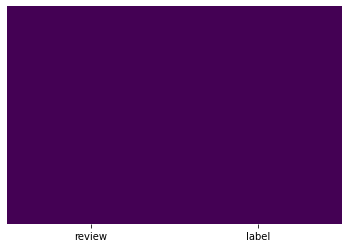

In [73]:
# Mapping to view missing data...none present.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [74]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", "!", ".", ",", ":", ";","\"", "'", "`", "-")) 
    return final
df['review'] = df['review'].apply(remove_punctuation)
df = df.dropna(subset=['review'])
#df['Summary'] = df['review'].apply(remove_punctuation)
#df_new = df[['Summary', 'sentiment']]
print("Longest Summary Review: ",len(max(df['review']))," chars")
#df.head(-5)

Longest Summary Review:  57  chars


#### Explore Data

In [75]:
# Sample DataFrame Fields
df.head()

,review,label
0,so there is no way for me to plug it in here in the us unless i go by a converter,0
1,good case excellent value,1
2,great for the jawbone,1
3,tied to charger for conversations lasting more than 45 minutesmajor problems,0
4,the mic is great,1


In [76]:
# Understand Columns, Shape and Types
print("*************"*5)
print("* DF Columns: ",df.columns)
print("* DF Shape: ",df.shape)
print("*************"*5)
pd.set_option('display.max_colwidth', 5000) # set max width
df.info()

*****************************************************************
* DF Columns:  Index(['review', 'label'], dtype='object')
* DF Shape:  (2748, 2)
*****************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  2748 non-null   object
 1   label   2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 64.4+ KB


In [77]:
df.describe(include='all')

,review,label
count,2748,2748.000000
unique,2719,NaN
top,great phone,NaN
freq,6,NaN
mean,NaN,0.504367
std,NaN,0.500072
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


In [78]:
# Tally Review Field Counts
print("Percentage of Pos/Neg Reviews:\n", df['label'].value_counts() / len(df['label']))
print("Totals:\n",df['label'].value_counts()) # Notice pos/neg ~approx equal

Percentage of Pos/Neg Reviews:
 1    0.504367
0    0.495633
Name: label, dtype: float64
Totals:
 1    1386
0    1362
Name: label, dtype: int64


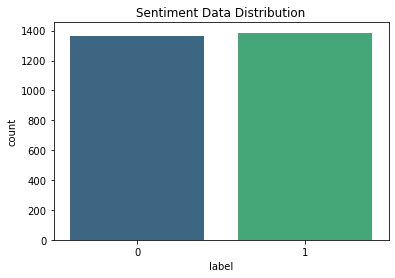

In [79]:
# View Data Distro
sns.countplot(data=df, x='label', palette='viridis').set(title='Sentiment Data Distribution');

In [80]:
# Longest Review
length_of_reviews = df.review.str.len()

type(length_of_reviews) # pandas.core.series.Series

# Find Max Length
print("Min: ", min(length_of_reviews))
print("Max: ", max(length_of_reviews))

Min:  7
Max:  7699


In [81]:
review_df = df
review_df.shape

(2748, 2)

In [82]:
# Vocab Size (B1b)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(review_df['review']) # Fit tokenizer on reviews
print('Vocab Size: ', len(tokenizer.word_index)+1) # Vocab size is the number of unique words + 1 for the 0 index

Vocab Size:  5383


In [83]:
# Remove Stop Words
description_list = [] # Create empty list to store cleaned reviews
stop_words = stopwords.words('english')

for description in review_df.review: # Loop through each review
    description = re.sub("[^a-zA-Z]", " ", description)
    
    #Convert to lower case
    description = description.lower()
    
    #Perform tokenization
    description=nltk.word_tokenize(description)
    
    #Perform lemmatization to bring the words to its root or join the inflected words.
    lemma = nltk.WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
    
    #Removing stopwords
    description = [word for word in description if not word in stop_words]
    description = " ".join(description)
    description_list.append(description)

In [84]:
# Display first five 5 reviews
description_list[0:5]

['way plug u unless go converter',
 'good case excellent value',
 'great jawbone',
 'tied charger conversation lasting minutesmajor problem',
 'mic great']

In [85]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [86]:
# Character Count
commentary = df['review'].str.lower()
list_of_chars = []
for comment in commentary:
    for character in comment:
        if character not in list_of_chars:
            list_of_chars.append(character)
num_of_chars = len(list_of_chars)
print("Number of Characters: ", num_of_chars)
print(list_of_chars) # Notice the presence of unusual characters (B1a)

Number of Characters:  56
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c', 'v', 'd', 'x', 'j', '4', '5', 'z', 'q', '+', 'k', '/', '7', '3', '6', '8', '0', '2', '1', ')', '(', '&', '$', '*', '%', '9', '#', '[', ']', '\x96', '\t', '\n', 'é', '\x85', 'å', '\x97', 'ê']


In [87]:
commentary_length = []
for char_len in commentary:
    commentary_length.append(len(char_len.split(' '))) # Count characters, split on spaces

# Set max, min, median vars
commentary_max = np.max(commentary_length)
commentary_min = np.min(commentary_length)
commentary_median = np.median(commentary_length)

print("The minimum length or our sequences is: ", commentary_min)
print("The median length or our sequences is: ", commentary_median)
print("The maximum length or our sequences is: ", commentary_max)

The minimum length or our sequences is:  1
The median length or our sequences is:  11.0
The maximum length or our sequences is:  1393


---
### Word Cloud
---

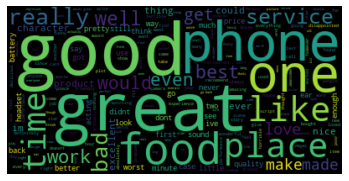

In [88]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Create Stopwords List
#stopwords = set(STOPWORDS)
stopwords = set(stopwords.words('english')) # NLTK Stopwords
stopwords.update(['br', 'href', 'movie', 'movies', 'film', 'films', 'cinema', 'also', "i've", ]) # Add additional stopwords
textt = " ".join(review for review in df['review'].iloc[:]) # Join all reviews into one string
wordcloud = WordCloud(stopwords=stopwords).generate(textt) # Generate WordCloud, save into variable
plt.imshow(wordcloud, interpolation='bilinear') # Plot WordCloud
plt.axis("off") # Remove axis
plt.savefig('./Output/wordcloud.png') # Save WordCloud as png
plt.show()

In [89]:
max_review_length = len(description)
print("Max Review Length: ", max_review_length)

Max Review Length:  72


In [90]:
df.columns

Index(['review', 'label'], dtype='object')

In [91]:
# Use Keras Tokenizer to Filter Data and Quantify Vocab Size
keras_token = Tokenizer(filters='\t\n})~!|#*=&><:;+.{/,(?$^%_-`@)[\\]', oov_token = '[UNK]', lower = True)
   
#Fit Commentary Dict Based on Frequency
keras_token.fit_on_texts(commentary)

word_count = keras_token.word_index # Create Dict Var
print('Size of data vocab: ', len(word_count)+1) # Print Word Count + 1 for 0 index
list(word_count.items())[2015:2022] # Random Sample


Size of data vocab:  5384


[('blown', 2016),
 ('events', 2017),
 ('result', 2018),
 ('slightest', 2019),
 ('duet', 2020),
 ('doctor', 2021),
 ('extraordinary', 2022)]

In [92]:
# tokens = nltk.word_tokenize('Today is a wonderful day')
# stemmed_tokens = [porter.stem(token) for token in tokens]
# stemmed_tokens

In [93]:
# Apply Tokenizer and Pad to max length
reviews = df.review.values # Convert to array
tokenizer = Tokenizer(num_words=10000) # Set vocab size
tokenizer.fit_on_texts(reviews) # Fit tokenizer on reviews
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(reviews) # Convert to sequences
padded_sequence = pad_sequences(encoded_docs, maxlen=200) # max length of 200 words
print("Length of DataFrame: ",len(df))
print("Length of Vocab Size: ",len(tokenizer.word_index) + 1)
# oov_tok = "<oov>" # Out of Vocabulary Token
embedding_dim = 32 # Embedding Dimension
max_length = 72 # Max Length of Sentence
# trunc_type='post'
# padding_type='post'

Length of DataFrame:  2748
Length of Vocab Size:  5383


In [94]:
vocab_size = 15000 # Set vocab size
max_sequence_embedding = int(round(np.sqrt(np.sqrt(vocab_size)),0)) # Max Sequence Length
max_sequence_embedding

11

In [95]:
# Convert Sentiment Scores
sentiment_label = df.label.factorize() # Convert to 0/1
sentiment_label

(array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 

In [96]:
print("Word Index Length: ",len(tokenizer.word_index)) # Print Word Index Length
print(tokenizer.word_index) # Print Word Index

Word Index Length:  5382
{'the': 1, 'and': 2, 'i': 3, 'a': 4, 'is': 5, 'to': 6, 'it': 7, 'this': 8, 'of': 9, 'was': 10, 'in': 11, 'for': 12, 'not': 13, 'that': 14, 'with': 15, 'my': 16, 'very': 17, 'good': 18, 'on': 19, 'great': 20, 'you': 21, 'but': 22, 'have': 23, 'are': 24, 'movie': 25, 'as': 26, 'so': 27, 'phone': 28, 'film': 29, 'its': 30, 'all': 31, 'be': 32, 'one': 33, '0': 34, 'had': 35, 'at': 36, '1': 37, 'food': 38, 'like': 39, 'just': 40, 'place': 41, 'time': 42, 'were': 43, 'service': 44, 'an': 45, 'if': 46, 'from': 47, 'really': 48, 'there': 49, 'bad': 50, 'they': 51, 'we': 52, 'out': 53, 'has': 54, 'well': 55, 'about': 56, 'dont': 57, 'would': 58, 'or': 59, 'no': 60, 'your': 61, 'by': 62, 'best': 63, 'only': 64, 'even': 65, 'ever': 66, 'here': 67, 'also': 68, 'will': 69, 'back': 70, 'up': 71, 'when': 72, 'me': 73, 'more': 74, 'than': 75, 'quality': 76, 'go': 77, 'what': 78, 'love': 79, 'ive': 80, 'he': 81, 'can': 82, 'made': 83, 'which': 84, 'because': 85, 'how': 86, 'pro

In [97]:
# Reviews Encoded and Padded
print(reviews[0])
print(encoded_docs[0])

so there is no way for me to plug it in here in the us unless i go by a converter
[27, 49, 5, 60, 118, 12, 73, 6, 368, 7, 11, 67, 11, 1, 184, 640, 3, 77, 62, 4, 2215]


In [98]:
# view padded sequence for above example
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0   27   49    5
   60  118   12   73    6  368    7   11   67   11    1  184  640    3
   77 

---
### Train, Test, Split
---

In [99]:
# Splitting the data into training and test set.
X = np.array(description_list)
y = review_df.label.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 15, stratify = y)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, 
                                                    y_train, 
                                                    random_state = 73,
                                                    test_size = 0.20,  
                                                    stratify = y_train)

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# View the training and testing sample sizes
print("Training size: ", X_train.shape)
print("Testing size: ", X_test.shape)


Training size:  (1758,)
Testing size:  (550,)


In [100]:
print("X Shape: ",X.shape)
print("y Shape: ",y.shape)
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X Shape:  (2748,)
y Shape:  (2748,)
X_train Shape:  (1758,)
X_test Shape:  (550,)
y_train Shape:  (1758,)
y_test Shape:  (550,)


In [101]:
#tokenizer = Tokenizer(oov_token='<UNK>')
tokenizer = Tokenizer(oov_token='<OOV>')

#Fit Commentary Dict Based on Frequency
keras_token.fit_on_texts(X_train)


word_count = keras_token.word_index # Create Dict Var
print('Size of data vocab: ', len(word_count)+1) # Print Word Count + 1 for 0 index
list(word_count.items())[2015:2022] # Random Sample


tokenizer.fit_on_texts(X_train)

vocab_size=len(tokenizer.word_index)+1
word_index=tokenizer.word_index
train_sequences=tokenizer.texts_to_sequences(X_train)
test_sequences=tokenizer.texts_to_sequences(X_test)
train_padded=pad_sequences(train_sequences, padding='post', maxlen=max_review_length)
test_padded=pad_sequences(test_sequences, padding='post', maxlen=max_review_length)

Size of data vocab:  5571


In [102]:
# Verify Shapes
print('X_train Shape: {}\nX_test Shape: {}\nX_Validation Shape: {}'.format(X_train.shape, X_test.shape, X_validation.shape))

X_train Shape: (1758,)
X_test Shape: (550,)
X_Validation Shape: (440,)


In [103]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_train

[[184, 222, 507, 64, 185, 33],
 [15, 156, 170],
 [645, 1449, 223, 33],
 [67, 102, 646],
 [29, 157, 899, 508, 49, 41],
 [4, 10, 158],
 [509, 255, 900, 115, 3],
 [2, 116, 44],
 [18, 89, 10, 901, 510, 1450, 12, 25, 647, 1451, 902, 1452],
 [67, 2, 3],
 [903, 1453, 1454],
 [303, 350, 256, 46, 2, 904, 1455, 7, 186],
 [905, 257, 9, 511, 7, 11, 906, 512, 1456, 97, 47, 907, 908, 28, 46, 138],
 [513, 1457, 224, 171, 139, 159, 79],
 [103, 1458, 34, 18, 909, 1459, 648, 6],
 [15, 3, 44],
 [22, 421, 304],
 [3, 126, 187, 2, 1460, 910, 1461, 68, 649],
 [49, 30, 3, 911, 117],
 [351, 912, 127, 350, 13, 913, 514],
 [914],
 [9, 41, 304],
 [10, 3],
 [160],
 [225, 915, 5, 73, 305, 1462, 226, 916],
 [917, 23, 26],
 [918, 1463, 919, 1464, 2, 1465, 79],
 [422, 650, 423, 24, 651, 652],
 [47, 11, 5, 1466, 920, 55, 5, 11, 9],
 [3, 515, 30],
 [42, 921, 516, 306, 16],
 [922, 30, 80, 2, 2, 653],
 [923, 517, 55, 81, 1467, 924, 1468, 925, 8, 188, 352, 307],
 [46, 104, 518, 1469, 189, 190, 69, 41],
 [4, 1470, 1471],
 [

In [104]:
# Train 
sequences_train = tokenizer.texts_to_sequences(X_train)
padded_train = train_padded #pad_sequences(sequences_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Test
sequences_test = tokenizer.texts_to_sequences(X_test)
padded_test =  test_padded #pad_sequences(sequences_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Display the Padded Sequence
np.set_printoptions(threshold=sys.maxsize)
padded_train[1]

array([ 15, 156, 170,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [105]:
# Convert padded data to numpy array to be used in model.
training_padded = np.array(padded_train)
training_label = np.array(y_train)
test_padded = np.array(padded_test)
test_label = np.array(y_test)

In [106]:
# Export padded train/test data
pd.DataFrame(X_train).to_csv('./Output/X_training_df.csv')
pd.DataFrame(X_test).to_csv('./Output/X_testing_df.csv')
pd.DataFrame(y_train).to_csv('./Output/y_training_df.csv')
pd.DataFrame(y_test).to_csv('./Output/y_testing_df.csv')
pd.DataFrame(X_validation).to_csv('./Output/X_validation_df.csv')
pd.DataFrame(y_validation).to_csv('./Output/y_validation_df.csv')

In [107]:
# B4 - Sentiment Analysis

activation = 'sigmoid' #'softmax'
loss = 'binary_crossentropy'  #'categorical_crossentropy'
optimzer = 'adam' #rmsprop

num_epochs = 20

# Define early_stopping_monitor
early_stopping_monitor=EarlyStopping(patience=2)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation=activation)
])

model.compile(loss=loss, optimizer=optimzer, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 72, 32)            115264    
                                                                 
 dropout_1 (Dropout)         (None, 72, 32)            0         
                                                                 
 global_average_pooling1d_1   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 100)               3300      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                      

In [108]:
history = model.fit(training_padded, training_label, batch_size=32 ,epochs=num_epochs, validation_split = 0.3, callbacks=[early_stopping_monitor], verbose=True)


Epoch 1/20
39/39 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4829 - val_loss: 0.6929 - val_accuracy: 0.5095
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5341 - val_loss: 0.6928 - val_accuracy: 0.5152
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5293 - val_loss: 0.6914 - val_accuracy: 0.5114
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.6049 - val_loss: 0.6858 - val_accuracy: 0.5852
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.7659 - val_loss: 0.6497 - val_accuracy: 0.7765
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.8837 - val_loss: 0.5765 - val_accuracy: 0.7008
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.9089 - val_loss: 0.4895 - val_accuracy: 0.7841
Epoch 8/20
39/39 [==

In [109]:
# Verify Model Accuracy on Test Data
score = model.evaluate(test_padded, test_label, verbose=0)
print(f'Test Loss: {score[0]} / Test Accuracy: {score[1]}')

Test Loss: 0.5053887367248535 / Test Accuracy: 0.7654545307159424


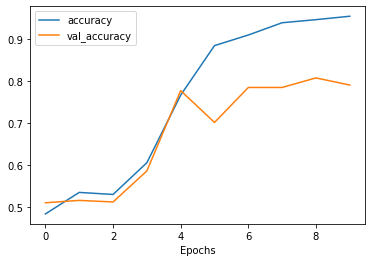

In [110]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('./Output/AccuracyPlot.png')
plt.show()

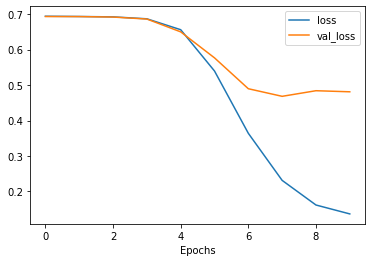

In [111]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.legend()
plt.savefig('./Output/LossPlot.png')
plt.show()

---
### Test Model
---

In [112]:
def predict_sentiment(review):
    tw = tokenizer.texts_to_sequences([review])
    tw = pad_sequences(tw, maxlen=72)
    prediction = int(model.predict(tw).round().item())
    if prediction == 0:
        return "Negative"
    elif prediction == 1:
        return "Positive"
    else:
        return "Houston, we have a problem"
    print("Prediction Label: ", sentiment_label[1][prediction])

In [113]:
test_sentence_one = "I enjoyed my journey with this class, I hope to leverage NLP skills at work soon!"
print("Sentence One Prediction: ", predict_sentiment(test_sentence_one))
test_sentence_two = "I hated this class, I'll never use NLP and hope to never take touch this subject again!"
print("Sentence Two Prediction: ", predict_sentiment(test_sentence_two))

Sentence One Prediction:  Positive
Sentence Two Prediction:  Negative


In [114]:
# Save the Model
model.save('./Output/JWillis_D213_PA2_SentimentAnalysisModel.h5')

## End 